#Calculating risk index and threshold

Total actual cases (first wave) = 172608

Total predicted cases (first wave) = 158786.8

Total actual cases (second wave) = 291306

Total predicted cases (second wave) = 255125.4

Risk Index =(Actual cases - Predicted cases ) / Predicted cases

RI(first wave) = 0.0870424997543

RI(second wave) = 0.1418149662871 


Threshold = [RI (Second Wave) - RI (First Wave) ] / RI (First Wave) 

**Threshold = 0.6292611849086**

Risk Index for each day = (Daily actual cases - Daily predicted cases ) / Daily predicted cases

In [ ]:
import pandas as pd
#importing dataset
df = pd.read_csv('/content/drive/MyDrive/Covid Dashboard Project/Raw Data/RI_Calculation.csv')
df.columns = ['Date' , 'Actual' , 'Predicted']
df

,Date,Actual,Predicted
0,14.05.2020,163,138.951126
1,15.05.2020,106,137.196854
2,16.05.2020,202,137.549255
3,17.05.2020,201,137.154617
4,18.05.2020,102,139.603745
...,...,...,...
496,22.9.2021,170,190.022492
497,23.9.2021,171,176.511963
498,24.9.2021,121,154.876694
499,25.9.2021,171,152.896576


In [ ]:
#Calculating risk index for each day
diff = df["Actual"] - df["Predicted"]
df["RI"] = diff / df["Predicted"]
df

,Date,Actual,Predicted,RI
0,14.05.2020,163,138.951126,0.173074
1,15.05.2020,106,137.196854,-0.227388
2,16.05.2020,202,137.549255,0.468565
3,17.05.2020,201,137.154617,0.465499
4,18.05.2020,102,139.603745,-0.269361
...,...,...,...,...
496,22.9.2021,170,190.022492,-0.105369
497,23.9.2021,171,176.511963,-0.031227
498,24.9.2021,121,154.876694,-0.218733
499,25.9.2021,171,152.896576,0.118403


In [ ]:
#Checking whether RI = threshold 
df[df.RI == 0.6292611849086]

,Date,Actual,Predicted,RI


In [ ]:
#Checking whether RI > threshold 
df[df.RI >= 0.6292611849086]

,Date,Actual,Predicted,RI
8,22.05.2020,291,148.599991,0.958277
11,25.05.2020,399,191.801285,1.080278
17,31.05.2020,271,117.853546,1.299464
62,15.07.2020,1416,859.808960,0.646877
63,16.07.2020,1812,1027.710083,0.763143
115,6.09.2020,3002,1534.198486,0.956722
188,18.11.2020,384,215.747467,0.779859
362,11.5.2021,2404,994.123901,1.418210
412,30.6.2021,508,292.323120,0.737803
468,25.8.2021,399,224.813339,0.774806


In [ ]:
#Checking whether RI < threshold 
df[df.RI <= 0.6292611849086]

,Date,Actual,Predicted,RI
0,14.05.2020,163,138.951126,0.173074
1,15.05.2020,106,137.196854,-0.227388
2,16.05.2020,202,137.549255,0.468565
3,17.05.2020,201,137.154617,0.465499
4,18.05.2020,102,139.603745,-0.269361
...,...,...,...,...
496,22.9.2021,170,190.022492,-0.105369
497,23.9.2021,171,176.511963,-0.031227
498,24.9.2021,121,154.876694,-0.218733
499,25.9.2021,171,152.896576,0.118403


In [ ]:
#creating new column threshold
df["Threshold"] = 0.6292611849086

In [ ]:
df

,Date,Actual,Predicted,RI,Threshold
0,14.05.2020,163,138.951126,0.173074,0.629261
1,15.05.2020,106,137.196854,-0.227388,0.629261
2,16.05.2020,202,137.549255,0.468565,0.629261
3,17.05.2020,201,137.154617,0.465499,0.629261
4,18.05.2020,102,139.603745,-0.269361,0.629261
...,...,...,...,...,...
496,22.9.2021,170,190.022492,-0.105369,0.629261
497,23.9.2021,171,176.511963,-0.031227,0.629261
498,24.9.2021,121,154.876694,-0.218733,0.629261
499,25.9.2021,171,152.896576,0.118403,0.629261


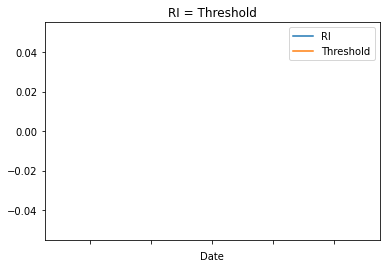

In [ ]:
import matplotlib.pyplot as plt
df1 = df[(df['RI'] == df['Threshold'])]
df1.plot(x="Date", y=["RI" , "Threshold"])
plt.title("RI = Threshold")
#plt.figure(figsize=(100 , 100), dpi=200)
plt.show()

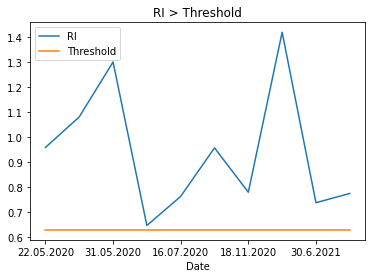

In [ ]:
df2 = df[(df['RI'] > df['Threshold'])]
df2.plot(x="Date", y=["RI" , "Threshold"])
plt.title("RI > Threshold")
#plt.figure(figsize=(100 , 100), dpi=200)
plt.show()

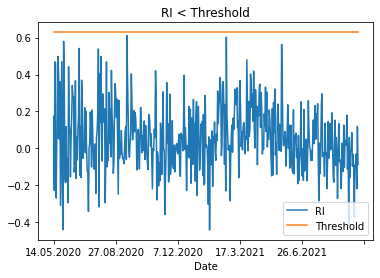

In [ ]:
df3 = df[(df['RI'] < df['Threshold'])]
df3.plot(x="Date", y=["RI" , "Threshold"])
plt.title("RI < Threshold")
#plt.figure(figsize=(100 , 100), dpi=200)
plt.show()

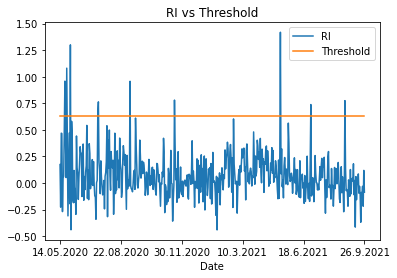

In [ ]:
df.plot("Date",["RI","Threshold"])
plt.title("RI vs Threshold")
plt.show()

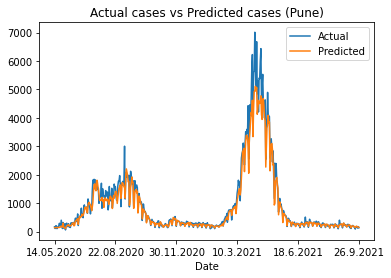

In [ ]:
df.plot(x="Date", y=["Actual", "Predicted"])
plt.title("Actual cases vs Predicted cases (Pune)")
plt.show()

Risk Index for each day = (Daily actual cases - Daily predicted cases ) / Daily predicted cases

RI = Risk Index for each day

AC = Daily actual cases

PC = Daily predicted cases

T  = Threshold

RI = (AC - PC)/PC

but **if there are no chances of third wave , RI should be less than threshold**

RI < T

i.e. (AC-PC)/PC  < T

hence , AC < (T * PC) + PC


In [ ]:
#importing data for the month Oct 21
df = pd.read_csv('/content/drive/MyDrive/Covid Dashboard Project/Raw Data/Oct_cov_pred.csv')
df.columns = ['Date' ,'Prediction']
df

,Date,Prediction
0,01/10/2021,202.003891
1,02/10/2021,201.803528
2,03/10/2021,217.557983
3,04/10/2021,186.270081
4,05/10/2021,212.284302
5,06/10/2021,254.148438
6,07/10/2021,249.877075
7,08/10/2021,258.900177
8,09/10/2021,238.014587
9,10/10/2021,278.868866


In [ ]:
#Inserting new column threshold
df["Threshold"]=0.6292611849086
df

,Date,Prediction,Threshold
0,01/10/2021,202.003891,0.629261
1,02/10/2021,201.803528,0.629261
2,03/10/2021,217.557983,0.629261
3,04/10/2021,186.270081,0.629261
4,05/10/2021,212.284302,0.629261
5,06/10/2021,254.148438,0.629261
6,07/10/2021,249.877075,0.629261
7,08/10/2021,258.900177,0.629261
8,09/10/2021,238.014587,0.629261
9,10/10/2021,278.868866,0.629261


In [ ]:
x = df["Threshold"]*df["Prediction"]
df["Actual Cases Limit"] = x + df["Prediction"]
#Actual cases should be less than acual cases limit
df

,Date,Prediction,Threshold,Actual Cases Limit
0,01/10/2021,202.003891,0.629261,329.117099
1,02/10/2021,201.803528,0.629261,328.790655
2,03/10/2021,217.557983,0.629261,354.458778
3,04/10/2021,186.270081,0.629261,303.482612
4,05/10/2021,212.284302,0.629261,345.866573
5,06/10/2021,254.148438,0.629261,414.074184
6,07/10/2021,249.877075,0.629261,407.115020
7,08/10/2021,258.900177,0.629261,421.816009
8,09/10/2021,238.014587,0.629261,387.787929
9,10/10/2021,278.868866,0.629261,454.350219


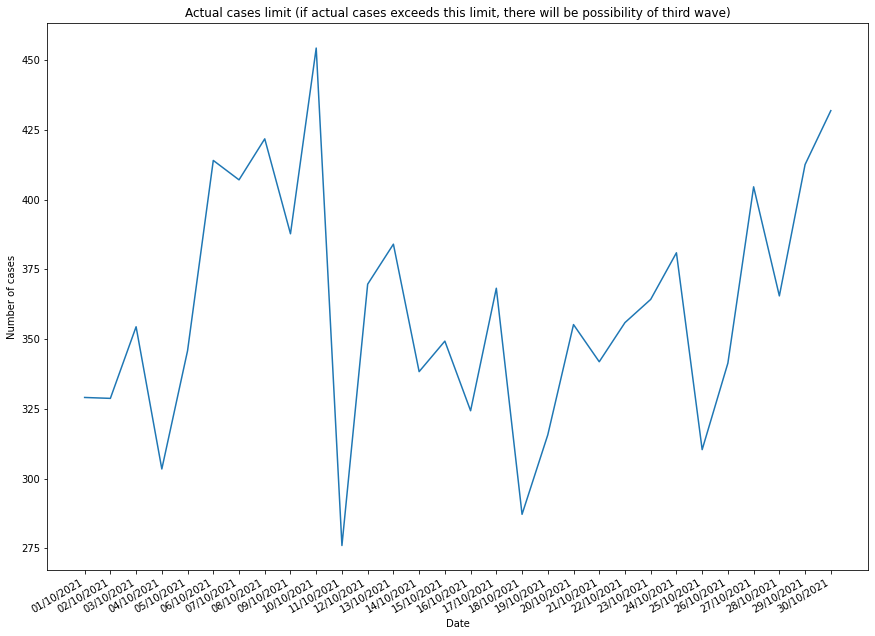

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.9,1.9])
ax.plot(df["Date"],df["Actual Cases Limit"])
ax.set_xlabel("Date")
ax.set_ylabel("Number of cases")
ax.set_title('Actual cases limit (if actual cases exceeds this limit, there will be possibility of third wave)')
ax.figure.autofmt_xdate()
plt.show()